In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.shape, test.shape

((614, 13), (367, 12))

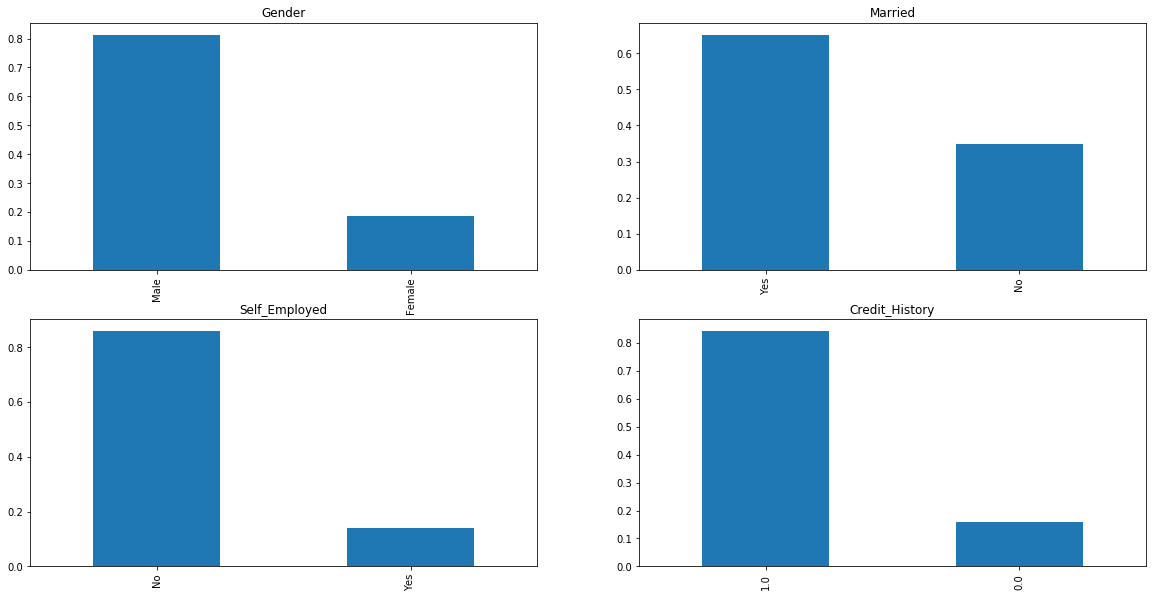

In [8]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

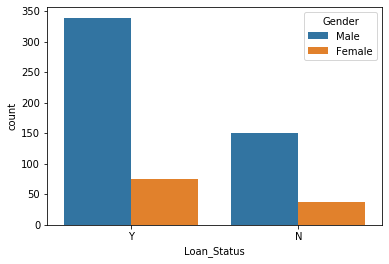

In [9]:
sns.countplot(x = 'Loan_Status', hue = 'Gender', data = train)

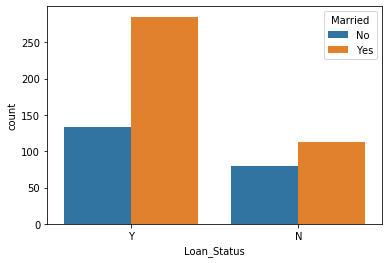

In [10]:
sns.countplot(x = 'Loan_Status', hue = 'Married', data = train)

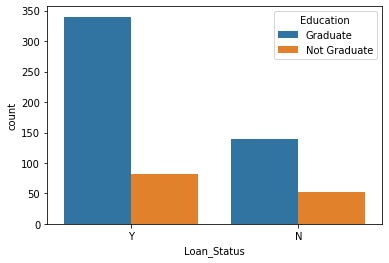

In [11]:
sns.countplot(x = 'Loan_Status', hue = 'Education', data = train)

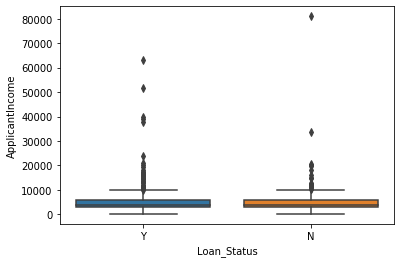

In [12]:
sns.boxplot(x = train.Loan_Status, y = train.ApplicantIncome)

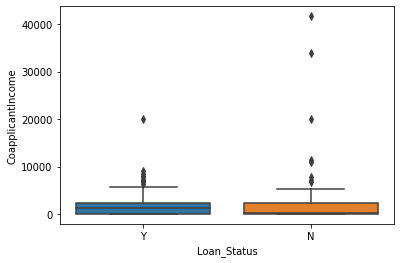

In [13]:
sns.boxplot(x = train.Loan_Status, y = train.CoapplicantIncome)

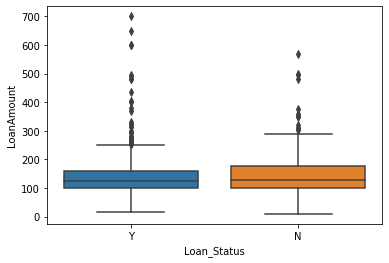

In [14]:
sns.boxplot(x = train.Loan_Status, y = train.LoanAmount)

In [15]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
train_original = train.copy()
test_original = test.copy()

In [18]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [19]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
categorical_features = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for feature in categorical_features:
    train[feature].fillna(train[feature].mode()[0], inplace = True)
    test[feature].fillna(test[feature].mode()[0], inplace = True)

In [21]:
numerical_feature = 'LoanAmount'
train[numerical_feature].fillna(train[numerical_feature].mode()[0], inplace=True)
test[numerical_feature].fillna(test[numerical_feature].mode()[0], inplace=True)

In [22]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [25]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [26]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
X_train.shape, X_test.shape

((429, 20), (185, 20))

In [30]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state = 1)
model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)

/home/saurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, pred1)

array([[ 27,  31],
       [  7, 120]])

In [32]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           N       0.79      0.47      0.59        58
           Y       0.79      0.94      0.86       127

    accuracy                           0.79       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.79      0.79      0.78       185



In [33]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5 )

model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

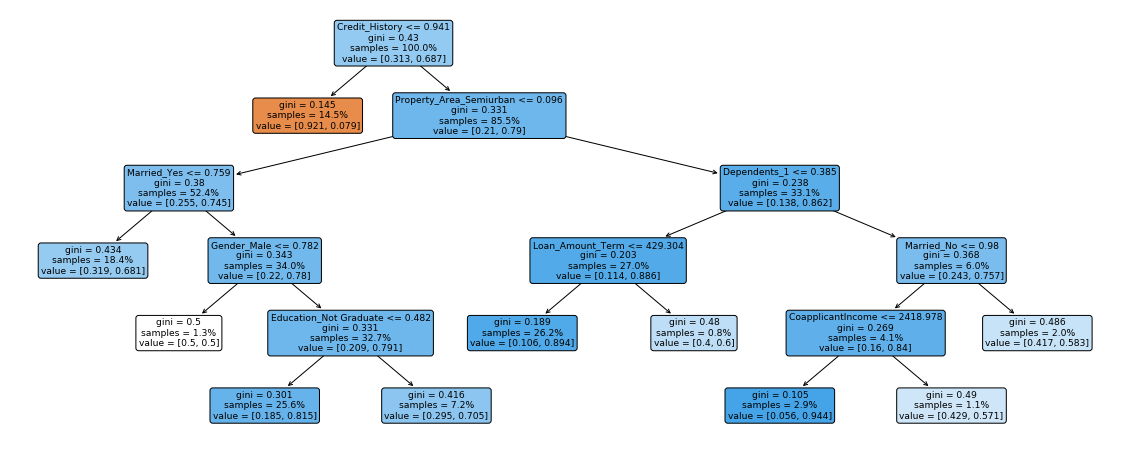

In [34]:
from sklearn import tree

cols = X.columns
plt.figure(figsize = (20,8))
tree.plot_tree(model2.fit(X, y), feature_names = cols, filled = True,precision = 3, proportion = True, rounded = True)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state = 3, max_depth = 10)
model3.fit(X_train, y_train)

pred3 = model3.predict(X_test)

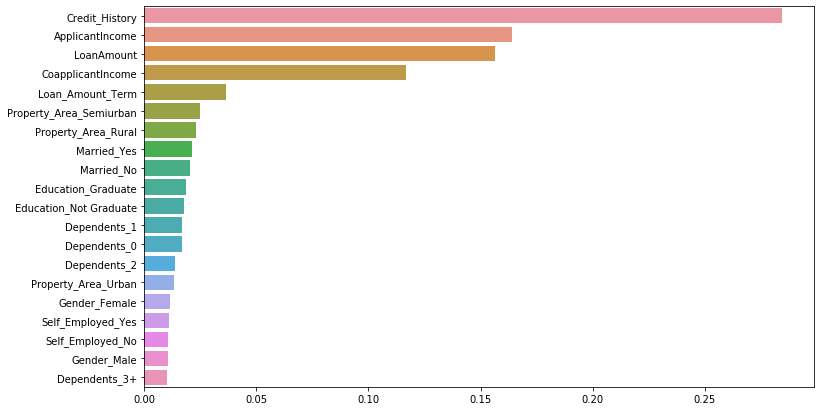

In [36]:
imp_features = pd.Series(model3.feature_importances_, index = X.columns).sort_values(ascending = False)
plt.figure(figsize = (12,7))
sns.barplot(x = imp_features, y = imp_features.index)

In [37]:
from xgboost import XGBClassifier

model4 = XGBClassifier(n_estimators = 50, max_depth = 4)
model4.fit(X_train, y_train)

pred4 = model4.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print("Models and their respective accuracies:")
print("Logistic Regression: ", accuracy_score(y_test, pred1))
print("Decision Tree      : ", accuracy_score(y_test, pred2))
print("Random Forst       : ", accuracy_score(y_test, pred3))
print("XGBoost            : ", accuracy_score(y_test, pred4))

Models and their respective accuracies:
Logistic Regression:  0.7945945945945946
Decision Tree      :  0.8216216216216217
Random Forst       :  0.7837837837837838
XGBoost            :  0.7513513513513513


Cross Validation using Stratified K-Fold

In [39]:
from sklearn.model_selection import StratifiedKFold

In [40]:
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

i = 1
for train_index, test_index in kf.split(X, y):
    print('\n{} of fold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model2 = DecisionTreeClassifier(random_state = 1)
    model2.fit(xtr, ytr)
    pred2 = model2.predict(xvl)
    score = accuracy_score(yvl, pred2)
    print('accuracy score: ', score)
    i += 1


1 of fold 5
accuracy score:  0.7073170731707317

2 of fold 5
accuracy score:  0.6991869918699187

3 of fold 5
accuracy score:  0.7235772357723578

4 of fold 5
accuracy score:  0.7154471544715447

5 of fold 5
accuracy score:  0.6721311475409836


In [41]:
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

i = 1
for train_index, test_index in kf.split(X, y):
    print('\n{} of fold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model3 = RandomForestClassifier(random_state = 1, max_depth = 10)
    model3.fit(xtr, ytr)
    pred3 = model3.predict(xvl)
    score = accuracy_score(yvl, pred3)
    print('accuracy score: ', score)
    i += 1


1 of fold 5
accuracy score:  0.8130081300813008

2 of fold 5
accuracy score:  0.8373983739837398

3 of fold 5
accuracy score:  0.7967479674796748

4 of fold 5
accuracy score:  0.8211382113821138

5 of fold 5
accuracy score:  0.7540983606557377


In [42]:
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

i = 1
for train_index, test_index in kf.split(X, y):
    print('\n{} of fold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model4 = XGBClassifier(n_estimators = 50, max_depth = 4)
    model4.fit(xtr, ytr)
    pred4 = model4.predict(xvl)
    score = accuracy_score(yvl, pred4)
    print('accuracy score: ', score)
    i += 1


1 of fold 5
accuracy score:  0.7886178861788617

2 of fold 5
accuracy score:  0.8048780487804879

3 of fold 5
accuracy score:  0.7967479674796748

4 of fold 5
accuracy score:  0.7317073170731707

5 of fold 5
accuracy score:  0.7459016393442623


In [43]:
pred_test = model2.predict(test)

In [44]:
submission = pd.read_csv('sample_submission.csv')

In [45]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [46]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('result.csv', index = False)